## Polynomial Interpolation

Say we are allowed to use $n$ pieces of "information" about a function and we wish to approximate it on an interval $[a,b]$.  Let's make it [-1,1] for convenience.

One choice is to interpolate the function at $n+1$ distinct places; this leads to Lagrange interpolation, which you covered last semester.

$$
f_I(x) = \sum f(x_i) l_i(x), \quad l_i(x)= \prod_{j \neq i} \frac{x-x_j}{x_i-x_j}, \quad i=0,\ldots,n
$$

The other extreme is a Taylor series centered at a point(here we will take $x_c=0$).

We'll take the function value and $n$ derivatives as the available 
"data".

The corresponding "Lagrange" basis for this point are the functions
$$
\mathcal{l}_p(x)=\frac{(x-x_c)^p}{p!}, \quad \ldots p=0,1,\ldots n
$$.

So
$$
f_I(x)= \sum f^{(p)}(x_c) \mathcal{l}_p(x) 
$$



In [2]:
# standard header
import numpy as np
import matplotlib.pyplot as plt
from interpolant import Interpolant
from scipy.misc import factorial
%matplotlib inline

## the function we will interpolate

def myfunc(x):
    return 1+np.sin(np.exp(3*x))

def Taylor(x,coeff,shift=0):
    ans=np.zeros(x.shape)
    for i in range(coeff.size):
        ans+=(x-shift)**i*coeff[i]/factorial(i)
    return ans

5
10
15


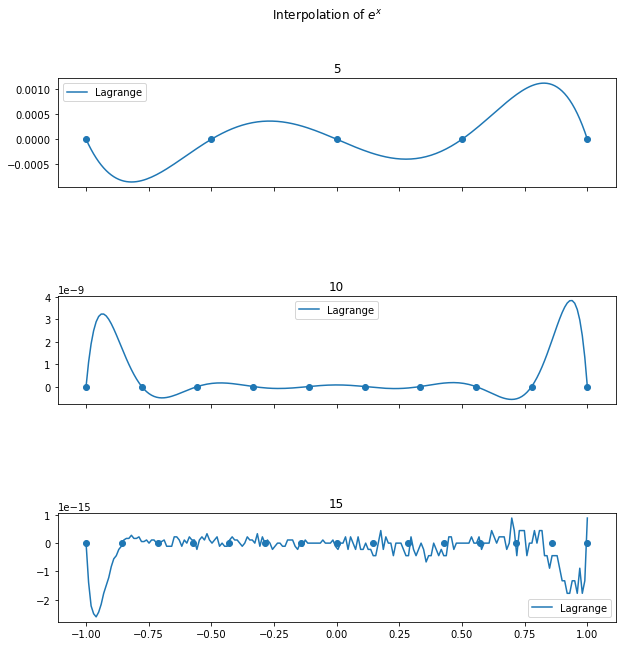

In [4]:
fig,ax=plt.subplots(3,figsize=(10,10),sharex=True)
plot_pts=np.linspace(-1,1,200)
data=np.exp(plot_pts)
n=[5,10,15]
fig.suptitle('Interpolation of $e^x$')
for i in range(3):
    coeff=np.ones(n[i])
    print(n[i])
    xp=np.linspace(-1,1,n[i]) # n equispaced points between -1 and 1
    yp=np.exp(xp)
    lagrange=Interpolant(xp,yp)
    ax[i].plot(plot_pts,lagrange.eval(plot_pts)-data,label='Lagrange')
    ax[i].scatter(xp,np.zeros(xp.shape))
    #ax[i].plot(plot_pts,Taylor(plot_pts,coeff)-data,label='Taylor')
    ax[i].legend()
    ax[i].set_title(n[i])
plt.subplots_adjust(hspace=1)
#plt.title('Interpolation of $e^x$')
plt.show()
    
    

## Function smoothness governs interpolation accuracy!

Consider $f(x)=\sqrt[3]{x}$ on $[-1,1]$.


5
10
15


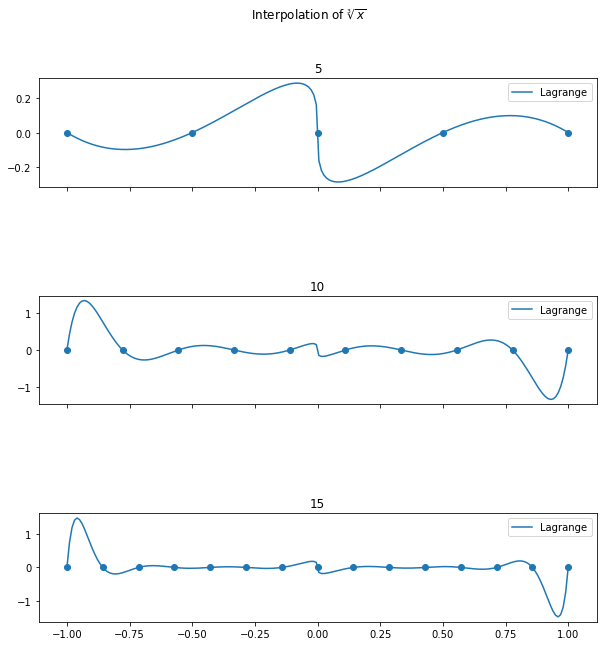

In [6]:
from scipy.special import cbrt

def tay_coeff(n,shift):
    exp=1/3
    cof=1
    coeff=np.zeros(n)
    for i in range(n):
        cof*=exp
        coeff[i]=cof*shift**(exp-1)
        exp-=1
    return coeff
    

fig,ax=plt.subplots(3,figsize=(10,10),sharex=True)
plot_pts=np.linspace(-1,1,200)
data=cbrt(plot_pts)
n=[5,10,15]
fig.suptitle('Interpolation of $\sqrt[3]{x}$')
for i in range(3):
    coeff=tay_coeff(n[i],.5) # np.ones(n[i])
    print(n[i])
    xp=np.linspace(-1,1,n[i]) # n equispaced points between -1 and 1
    yp=cbrt(xp)
    lagrange=Interpolant(xp,yp)
    ax[i].plot(plot_pts,lagrange.eval(plot_pts)-data,label='Lagrange')
    ax[i].scatter(xp,np.zeros(xp.shape))
    #ax[i].plot(plot_pts,Taylor(plot_pts,coeff,shift=.5)-data,label='Taylor')
    ax[i].legend()
    ax[i].set_title(n[i])
plt.subplots_adjust(hspace=1)
plt.show()

### Hermite versus Lagrange using 2n pieces of data

Two different error functions $E(x)$.



In [1]:
def err_lag(x,xp):
    ans=np.ones(x.shape)
    for point in xp:
        ans*=(x-point)
    return ans

def err_herm(x,xp):
    ans=np.ones(x.shape)
    for point in xp:
        ans*=(x-point)**2
    return ans

n=[4,6,8,10]
plt_points=np.linspace(-1,1,200)
fig,ax=plt.subplots(4,sharex=True,figsize=(10,10))
for loop in range(4):
    i=n[loop]
    lag=np.linspace(-1,1,2*i)
    herm=np.linspace(-1,1,i)
    ax[loop].plot(plt_points,err_lag(plt_points,lag),label='Lagrange')
    ax[loop].plot(plt_points,err_herm(plt_points,herm),label='Hermite')
plt.legend()
plt.show()

    
    

NameError: name 'np' is not defined

## The Lagrange constant

$$\lambda_n(X,x)= \sum_{i=1}^n |\mathcal{l}_{i,n}(X,x)| $$
where
$$
\mathcal{l}_i(x)= \prod_{j \neq i} \frac{x-x_j}{x_i-x_j}, \quad i=0,\ldots,n
$$

Then
$$\Lambda_n(X)= \max_{\|x\|<1} \lambda_n(X,x)
$$

In [ ]:
def lag_fun(x,xp):
    lag=np.zeros(x.shape)
    for i in xp:
        temp=np.ones(x.shape)
        for j in xp:
            if i != j:
                temp*=(x-j)/(i-j)
        lag+=np.absolute(temp)
    return lag

for n in range(5,15):
    plot_pts=np.linspace(-1,1,100)
    xp=np.linspace(-1,1,n)
    plt.plot(plot_pts,lag_fun(plot_pts,xp))
    

    
        